# Data understanding

De gebruikte dataset is “Vestigingen_Gemeente" (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/81575NED/table?ts=1584707583585). 

De CBS data is een csv bestand, dit staat voor comma seperated values of door comma gescheide waarden in het nederlands.
De data bevat de volgende kolomen:
 - `ID` is de unieke waarde voor elke row.
 - `Bedrijfstakken/branches SBI 2008` geeft de waarde weer in welke bedrijfstak/branch de bedrijfen zit.
 - `Perioden` geeft de periode aan waarin de bedrijfstak/branch actief in is.
 - `Regio's` is de regio waarin de behorende bedrijfstak/branch actief in is.
 - `Vestigingen (aantal)` is de aantal vestigingen die binnen die bedrijfstak/branch geteld zijn per regio en per periode.

## Beschrijven van de data
Hieronder staat een beschrijving van de data vanuit de app store. Dit wordt telkens door middel van een stukje code weergegeven. 

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

file = "../../../raw-data/Vestigingen_Gemeente.csv"
data_vg = pd.read_csv(file, sep=";")

data_vg.head()

,Bedrijfstakken/branches SBI 2008,Perioden,Regio's,Vestigingen (aantal)
0,"A Landbouw, bosbouw en visserij",2020*,Amsterdam,130
1,"A Landbouw, bosbouw en visserij",2020*,Arnhem,55
2,"A Landbouw, bosbouw en visserij",2020*,Assen,75
3,"A Landbouw, bosbouw en visserij",2020*,Breda,210
4,"A Landbouw, bosbouw en visserij",2020*,Eindhoven,45


In [2]:
data_vg.describe()

,Vestigingen (aantal)
count,323.000000
mean,1586.300310
std,3435.543799
min,0.000000
25%,97.500000
50%,595.000000
75%,1552.500000
max,40725.000000


In [3]:
data_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Bedrijfstakken/branches SBI 2008  323 non-null    object
 1   Perioden                          323 non-null    object
 2   Regio's                           323 non-null    object
 3   Vestigingen (aantal)              323 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.2+ KB


In [4]:
data_vg.columns

Index(['Bedrijfstakken/branches SBI 2008', 'Perioden', 'Regio's',
       'Vestigingen (aantal)'],
      dtype='object')

In [5]:
data_vg.isna().sum()

Bedrijfstakken/branches SBI 2008    0
Perioden                            0
Regio's                             0
Vestigingen (aantal)                0
dtype: int64

## Data exploratie

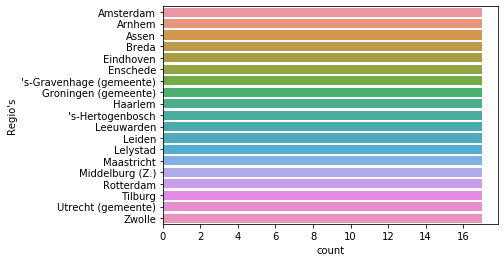

In [6]:
# Het laten zien van hoevaak een regio voorkomt in de dataset.
sb.countplot(y="Regio's", data=data_vg)

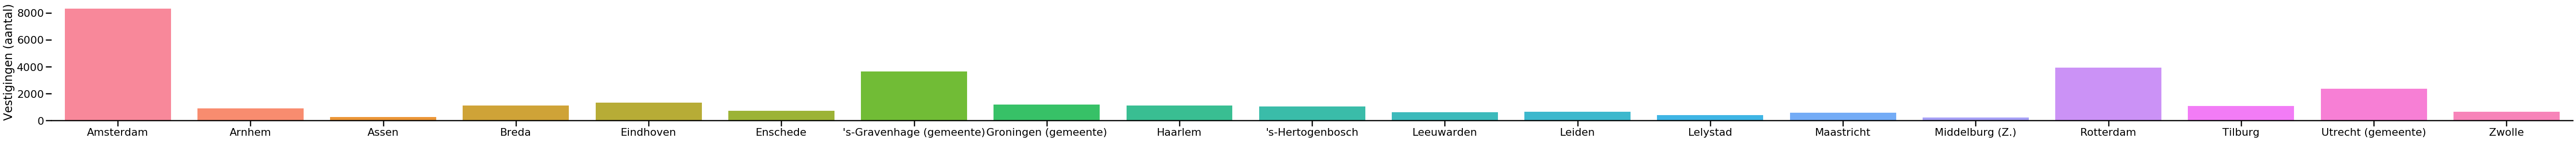

In [53]:
g = sb.catplot(x="Regio's", y="Vestigingen (aantal)",
                data=data_vg, saturation=10,
                kind="bar", ci=None, aspect=15)
(g.set_axis_labels("", "Vestigingen (aantal)")
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

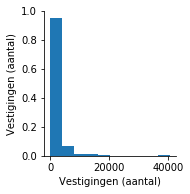

In [3]:
sb.pairplot(data_vg, kind="reg")

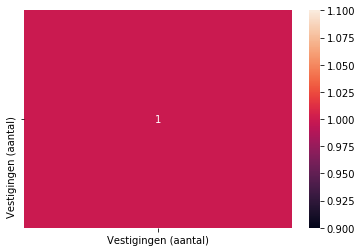

In [4]:
sb.heatmap(data_vg.corr(), annot=True)

### Samenvatting

Je hebt nu 4 verschillende datasets:
- `data_vg` is de 'standaard' dataframe met het aantal talen en genres
- `df_all` is de dataframe met daarin ALLE variabelen incl. taal en genres met boolean values eraan gekoppeld
- `df_languages` is de dataframe met daarin alle variabelen van taal met boolean values eraan gekoppeld
- `df_genres` is de dataframe met daarin alle variabelen van genres met boolean values eraan gekoppeld